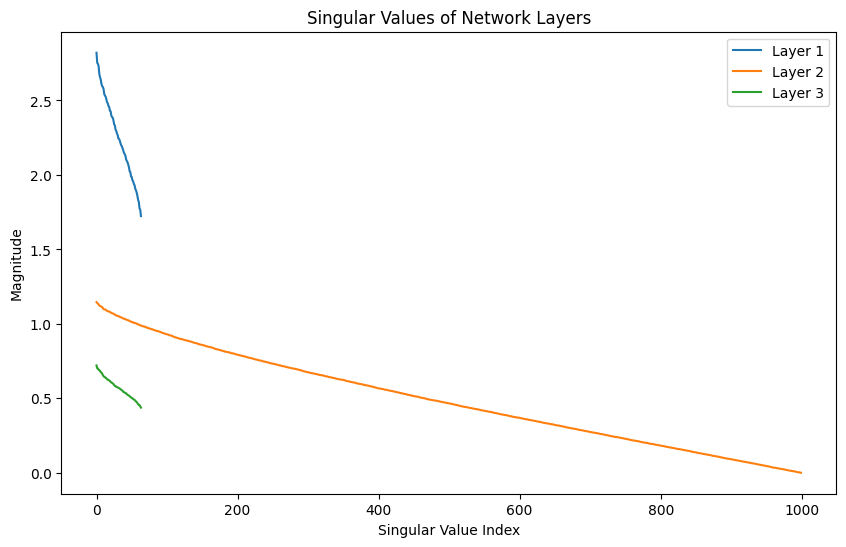

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class LinearDeepNetwork(nn.Module):
    def __init__(self, input_dim, layer_widths, output_dim):
        super(LinearDeepNetwork, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(input_dim, layer_widths[0])])
        for i in range(len(layer_widths)-1):
            self.linears.append(nn.Linear(layer_widths[i], layer_widths[i+1]))
        self.linears.append(nn.Linear(layer_widths[-1], output_dim))

    def forward(self, x):
        for lin in self.linears:
            x = lin(x)
        return x


def regularized_loss(model, outputs, labels, lambda_reg):
    l2_reg = torch.tensor(0.)
    for param in model.parameters():
        l2_reg += torch.norm(param)
    loss = nn.MSELoss()(outputs, labels)
    return loss + lambda_reg * l2_reg

def train(model, data_loader, optimizer, lambda_reg, epochs):
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, labels) in enumerate(data_loader):
            optimizer.zero_grad()
            outputs = model(data)
            loss = regularized_loss(model, outputs, labels, lambda_reg)
            loss.backward()
            optimizer.step()

def singular_values(model):
    svs = []
    for lin in model.linears:
        u, s, v = torch.linalg.svd(lin.weight.data)
        svs.append(s.numpy())
    return svs

def plot_singular_values(singular_values_list):
    plt.figure(figsize=(10, 6))
    for i, svs in enumerate(singular_values_list):
        plt.plot(svs, label=f"Layer {i+1}")
    plt.title("Singular Values of Network Layers")
    plt.xlabel("Singular Value Index")
    plt.ylabel("Magnitude")
    plt.legend()
    plt.show()

input_dim = 64
output_dim = 64
layer_widths = [1000, 1000]
num_samples = 1000
data = torch.randn(num_samples, input_dim)
labels = torch.randn(num_samples, output_dim)

# Data loader
dataset = torch.utils.data.TensorDataset(data, labels)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=32)

model = LinearDeepNetwork(input_dim, layer_widths, output_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lambda_reg = 1e-4
epochs = 10

before_training_svs = singular_values(model)

train(model, data_loader, optimizer, lambda_reg, epochs)

after_training_svs = singular_values(model)

#Plot
plot_singular_values(before_training_svs)

**Visualization: Singular Values of Network Layers**

*   **Graph Depiction:** The graph illustrates the magnitude of singular values for each layer within the deep linear neural network. Each distinct line within the graph corresponds to a specific layer of the network.

*   **Singular Values:** Singular values characterize the potency of the linear transformation executed by that layer; they delineate the extent to which various signals are influenced by that particular layer. A greater singular value indicates a more pronounced effect of the layer on the input signal it receives.
*   **Singular Value Index:** The x-axis represents the index of the singular values, ordered from largest to smallest. Thus, the first singular value represents the maximal influence.
*   **Magnitude:** The y-axis denotes the magnitude of the singular values.

**Analysis and Interpretation:**

*   **Rapid Singular Value Decay:** A salient feature is the expeditious decay of singular values as the singular value index increases. This suggests that each layer primarily relies on a limited number of dominant directions in the input space. Such reliance on a sparse set of dominant modes is conducive to enhanced robustness.
*   **Deep Linear Network Characterization:** The linear network exhibits a propensity for a "low-rank" character, which inherently favors generalization capabilities as opposed to rote memorization of training data.
    *   Disparate lines are indicative of varying strengths!
*   **Layer-Specific Observations:**
    *   Layer 1: Demonstrates a relatively rapid initial decay followed by a subsequent plateau, indicating a potential reduction in representational capacity.
    *   Layer 2: Exhibits a more controlled, gradual decay, signifying a more stable contribution to the overall transformation.
    *   Layer 3: Shows indications suggestive of overfitting or a reduced capacity for encoding information.

In summation, the graph furnishes pivotal insights into the operational dynamics of the neural network. It reveals:
*   A propensity for grouping, suggestive of regularization effects.
*   The adoption of low-dimensional representational structures by individual layers.